### Name : Aditya Bhawsar 
### PRN  : 250240128002
### Assignment 1

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as  np
import tensorflow
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#global hyperparameter
Random_State = 24
np.random.seed(Random_State)
Test_Size = 0.2

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Deep_Learning/Day1/breast_cancer_mod.csv')

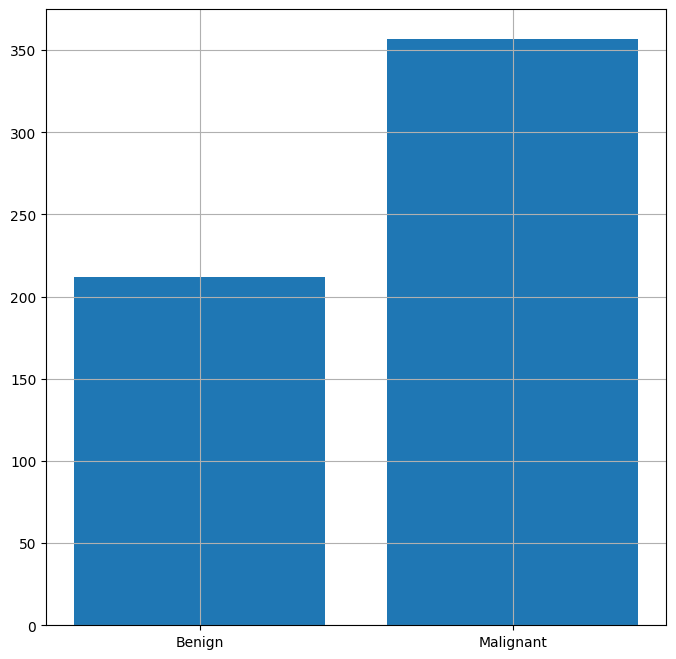

In [ ]:
labels = ['Malignant','Benign']
fig,ax = plt.subplots(figsize=(8,8))
ax.bar(df['target'].value_counts().index, df['target'].value_counts().values)
ax.set_xticks(df['target'].value_counts().index)
ax.set_xticklabels(labels)
ax.grid(True)
plt.show()

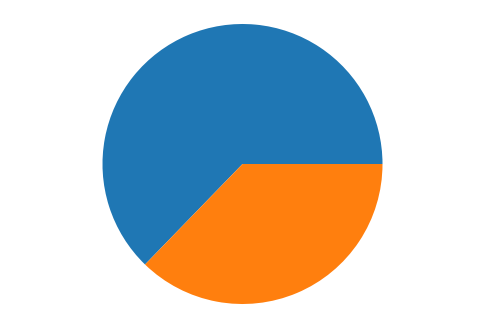

In [ ]:
fig,ax = plt.subplots(figsize=(6,4))
ax.pie(df['target'].value_counts())
ax.axis('equal')
plt.show()

In [ ]:
features = df.drop('target',axis=1)
labels =  df['target']
features.shape , labels.shape

((569, 31), (569,))

In [ ]:
x_train,x_test, y_train,y_test = train_test_split(features,labels,test_size=Test_Size,random_state=Random_State,stratify=labels)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 31), (114, 31), (455,), (114,))

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 455 entries, 146 to 345
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   mean radius              455 non-null    int64
 1   mean texture             455 non-null    int64
 2   mean perimeter           455 non-null    int64
 3   mean area                455 non-null    int64
 4   mean smoothness          455 non-null    int64
 5   mean compactness         455 non-null    int64
 6   mean concavity           455 non-null    int64
 7   mean concave points      455 non-null    int64
 8   mean symmetry            455 non-null    int64
 9   mean fractal dimension   455 non-null    int64
 10  radius error             455 non-null    int64
 11  texture error            455 non-null    int64
 12  perimeter error          455 non-null    int64
 13  area error               455 non-null    int64
 14  smoothness error         455 non-null    int64
 15  compactne

In [ ]:
df['total'] = df.astype(np.int16).sum(axis=1)
df.sort_values('total', inplace =True)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,total
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,1,0,12
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,13
2,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,1,0,13
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,14
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,14


<Axes: xlabel='total'>

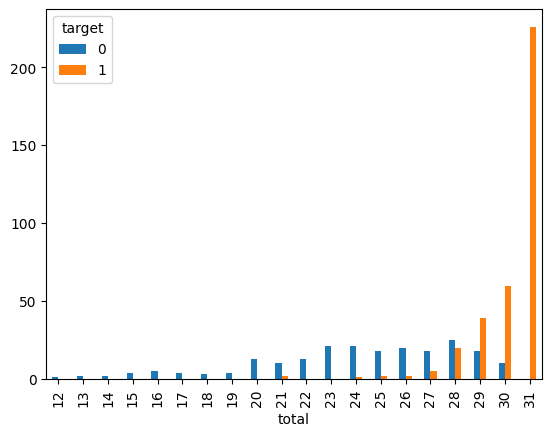

In [ ]:
tmp_df = df.groupby(['total', 'target']).agg({'target': 'count'})
tmp_df.columns = ['count']
tmp_df.reset_index(inplace=True)
tmp_df.pivot(index='total', columns = 'target', values = 'count').plot(kind='bar')



In [ ]:
acc ={}
x_train['target'] = y_train
for b  in range(x_train.shape[1]):
  x_train['pred'] = x_train['total'] >= b
  acc[b] = accuracy_score(x_train['pred'],x_train['target'])

In [ ]:
best_b = max(acc, key = acc.get)
best_b

29

In [ ]:
x_test['pred'] = x_test['total'] >= best_b
x_test['target'] = y_test
accuracy_score(x_test['pred'],x_test['target'])

0.8947368421052632

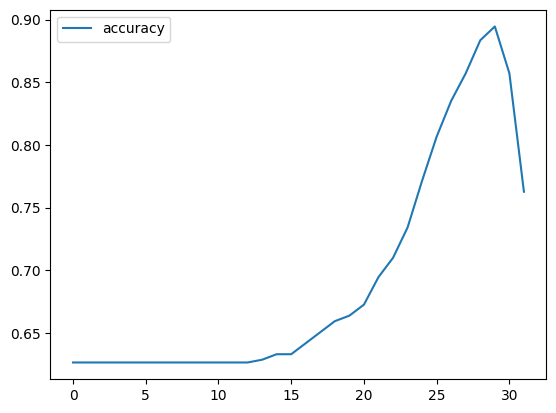

In [ ]:
ax = pd.DataFrame([acc],index = ['accuracy']).T.plot()